# Lending Club Case Study

### Problem Statement:

The Consumer finance company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 

### Data:

Use the Loan dataset given and analyse risky loan applicants, then such loans can be reduced thereby cutting down the Credit loss for the Company.

### Solution:

By Using Exploratory Data Analysis and the different concepts such as Univariate, Bivariate and Correlation analysis, we need to understand the factors or drivers which are driving the loan defaulters and come up with a solution to overcome the problem.

### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [6]:
#data = pd.read_csv(r'/Users/dineshkumarreddyguvva/Downloads/loan.csv', low_memory=False) #loading the dataset setting low memory as false it was throwing Dtype warning CLolumn 47

data = pd.read_csv(r'C:\Users\Dell\Documents\Python - Upgrad\Lending Club Case Study\loan.csv', low_memory=False)



### Data Cleansing

#### Removing unncessary columns

In [7]:
# Remove unnecessary Columns by using Iloc

data_cleaned = data.drop(data.iloc[:,53:111],axis=1)

#### Remove Column with Null Values

In [8]:
data.dropna(axis = 1, how = 'all', inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Missing Values

In [9]:
# Check for missing values

missing_values = data.isnull().sum()

#### Removing Columns with more than 50% missing values

In [10]:
threshold = 0.5*len(data)
data_cleaned = data.dropna(thresh=threshold, axis=1)

data_cleaned = data.copy()

#### Data Type Conversions

In [11]:
#Converting Int_rate to numeric 
data_cleaned['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

#converting term values to numeric
data_cleaned['term'] = data_cleaned['term'].str.extract('(\d+)').astype(int)

In [12]:
#converting issue_d to month and year 

#converting. employee lentgh values to numeric
emp_length_mapping = {
    '10 + years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5  # Assuming less than 1 year is represented as 6 months
}

data_cleaned['emp_length'] = data_cleaned['emp_length'].map(emp_length_mapping)

In [13]:
# Convert the 'issue_d' column to a datetime format
data_cleaned['issue_d'] = pd.to_datetime(data_cleaned['issue_d'], format='%b-%y')
# Extract 'issued_date' and 'issued_year' into new columns
data_cleaned['issued_date'] = data_cleaned['issue_d'].dt.date
data_cleaned['issued_year'] = data_cleaned['issue_d'].dt.year

# Display the updated DataFrame
print(data_cleaned[['issue_d', 'issued_date', 'issued_year']].head())



     issue_d issued_date  issued_year
0 2011-12-01  2011-12-01         2011
1 2011-12-01  2011-12-01         2011
2 2011-12-01  2011-12-01         2011
3 2011-12-01  2011-12-01         2011
4 2011-12-01  2011-12-01         2011


In [14]:
## Quick check on the Data

data_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_date,issued_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011-12-01,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011-12-01,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011-12-01,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011-12-01,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011-12-01,2011


In [15]:
#Calculate 'loan_income_ratio' based on 'loan_amnt' and 'annual_inc':

data_cleaned['loan_income_ratio'] = data_cleaned['loan_amnt'] / data['annual_inc']

# Convert the 'issue_d' column to a datetime format
data_cleaned['issue_d'] = pd.to_datetime(data_cleaned['issue_d'], format='%b-%y')

### Quick Check on Outliers based on Numerical columns

<Axes: >

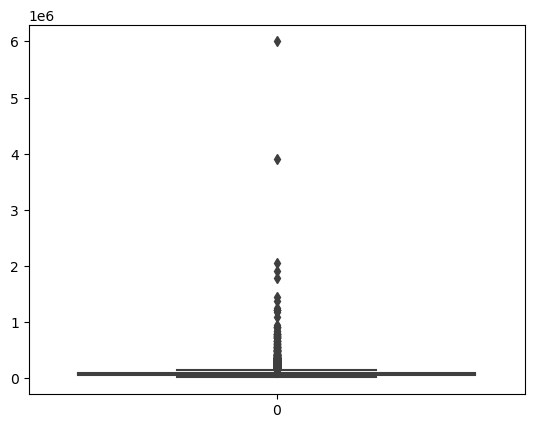

In [16]:
## Checking outliers for annual_inc column
sns.boxplot(data_cleaned['annual_inc'])

### It clearly indicates that the data is skewed and has outliers

In [17]:
quantile_info = data_cleaned.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64

### Removed Outiers by considering at 0.95 Percentile as a threshold

<Axes: >

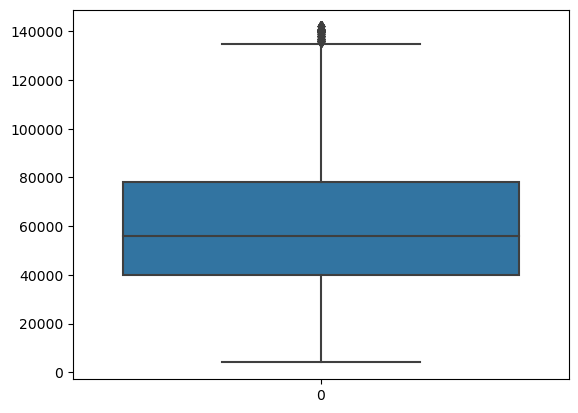

In [18]:
per_95_annual_inc = data_cleaned['annual_inc'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned.annual_inc <= per_95_annual_inc]
sns.boxplot(data_cleaned.annual_inc)

<Axes: >

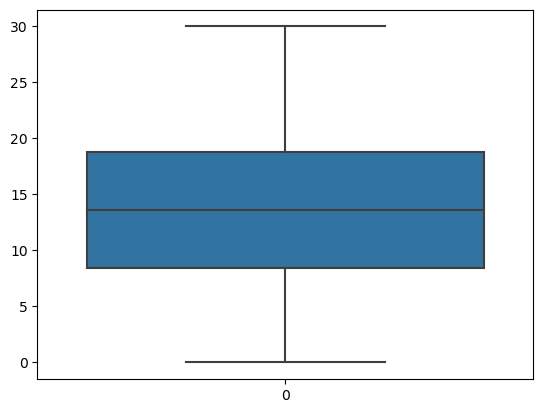

In [19]:
## Checking outliers for dti
sns.boxplot(data_cleaned.dti)

<Axes: >

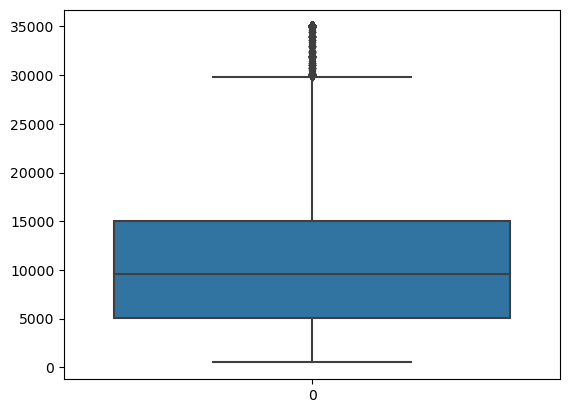

In [20]:
## checking outliers for loan_amt
sns.boxplot(data_cleaned.loan_amnt)

In [21]:
data_cleaned.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20495.0
0.950    25000.0
0.970    27000.0
0.975    29000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

##### Removing Records related to "Current" under Loan status as they don't contribute to our analysis

In [29]:
data_cleaned = data_cleaned[data_cleaned.loan_status != "Current"]

### Data Inspection

In [30]:
data_cleaned.shape
data_cleaned.info()
data_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36689 entries, 0 to 39716
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          36689 non-null  int64         
 1   member_id                   36689 non-null  int64         
 2   loan_amnt                   36689 non-null  int64         
 3   funded_amnt                 36689 non-null  int64         
 4   funded_amnt_inv             36689 non-null  float64       
 5   term                        36689 non-null  int32         
 6   int_rate                    36689 non-null  float64       
 7   installment                 36689 non-null  float64       
 8   grade                       36689 non-null  object        
 9   sub_grade                   36689 non-null  object        
 10  emp_title                   34485 non-null  object        
 11  emp_length                  27782 non-null  float64   

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issued_year,loan_income_ratio
count,3.668900e+04,3.668900e+04,36689.000000,36689.000000,36689.000000,36689.000000,36689.000000,36689.000000,27782.000000,36689.000000,...,36689.000000,36644.0,36689.0,36689.0,36644.0,36689.0,36031.000000,36659.0,36689.000000,36689.000000
mean,6.760687e+05,8.419523e+05,10685.646243,10439.323776,9897.075609,41.848729,11.887885,311.980852,3.530001,60932.566364,...,2629.104007,0.0,1.0,0.0,0.0,0.0,0.044684,0.0,2010.308376,0.190481
std,2.092071e+05,2.643603e+05,7050.906917,6802.878111,6732.590215,10.303628,3.667520,199.270901,2.481774,27848.222550,...,4306.803627,0.0,0.0,0.0,0.0,0.0,0.207282,0.0,0.881081,0.115631
min,5.473400e+04,7.472400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.500000,4000.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2007.000000,0.007375
25%,5.122200e+05,6.613880e+05,5000.000000,5000.000000,4976.203682,36.000000,8.940000,163.080000,1.000000,40000.000000,...,212.450000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2010.000000,0.100227
50%,6.556010e+05,8.378060e+05,9250.000000,9000.000000,8375.000000,36.000000,11.710000,270.440000,3.000000,56000.000000,...,544.170000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2011.000000,0.166667
75%,8.279370e+05,1.035971e+06,15000.000000,14400.000000,13627.535040,36.000000,14.270000,408.790000,5.000000,78000.000000,...,3307.450000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2011.000000,0.255556
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,9.000000,142000.000000,...,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,2011.000000,0.830000


In [31]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36689 entries, 0 to 39716
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          36689 non-null  int64         
 1   member_id                   36689 non-null  int64         
 2   loan_amnt                   36689 non-null  int64         
 3   funded_amnt                 36689 non-null  int64         
 4   funded_amnt_inv             36689 non-null  float64       
 5   term                        36689 non-null  int32         
 6   int_rate                    36689 non-null  float64       
 7   installment                 36689 non-null  float64       
 8   grade                       36689 non-null  object        
 9   sub_grade                   36689 non-null  object        
 10  emp_title                   34485 non-null  object        
 11  emp_length                  27782 non-null  float64   

## Exploratory Data Analysis

### Performing Univariate Analysis

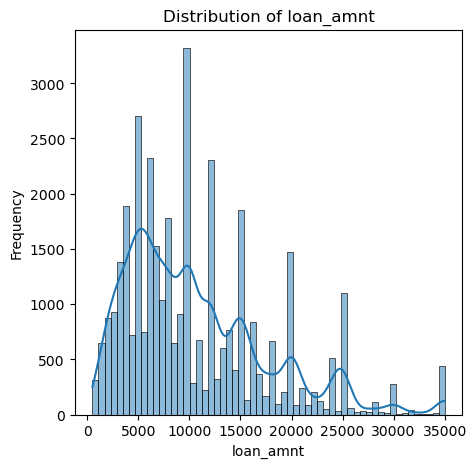

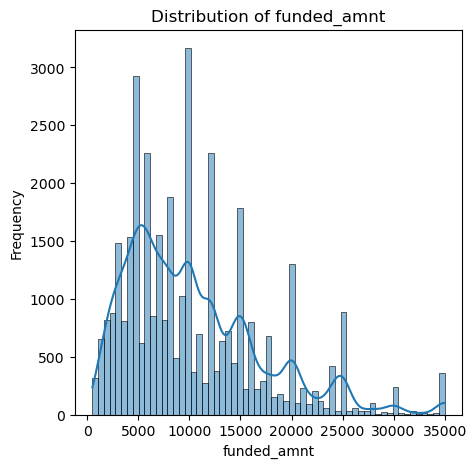

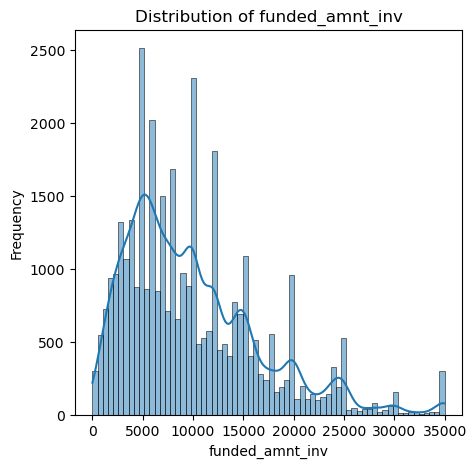

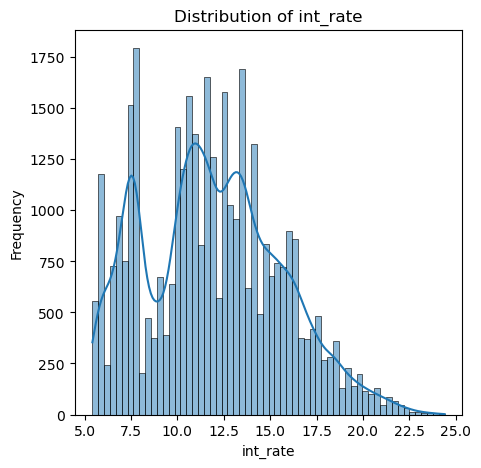

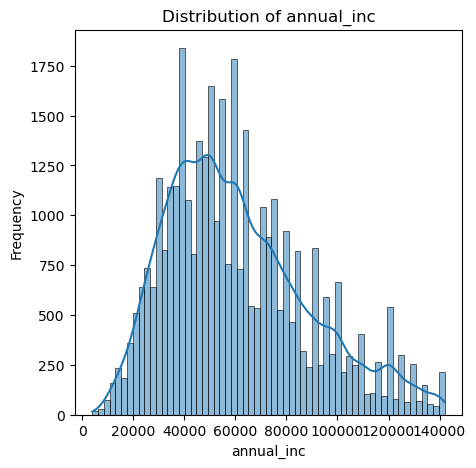

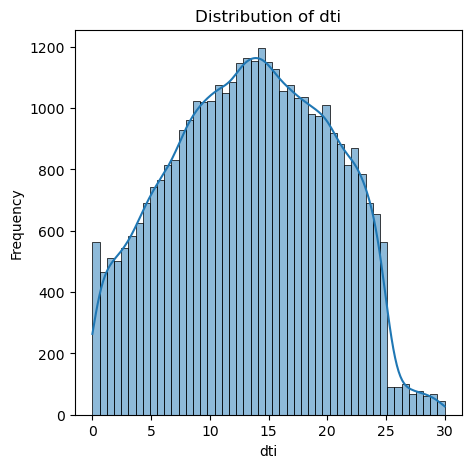

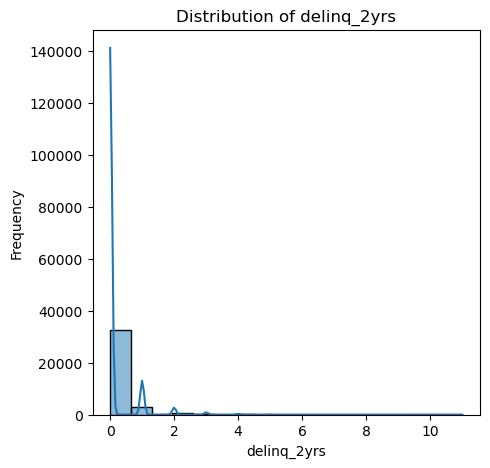

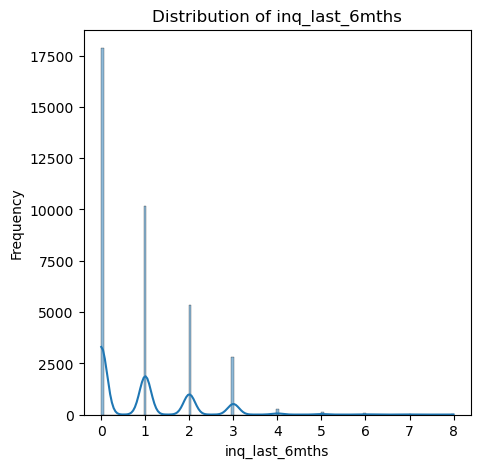

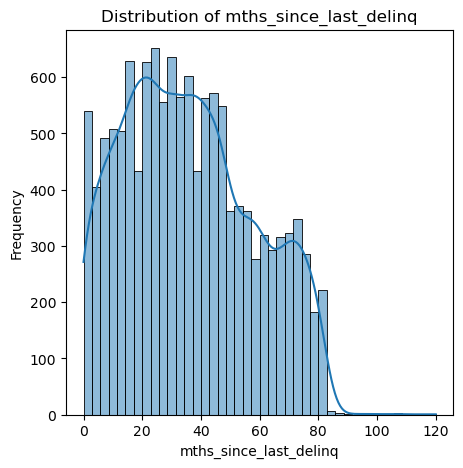

In [32]:
numeric_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq']
for column in numeric_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=data_cleaned, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Segmented Analysis

#### By Interest Rate Group by Loan Status (Charged Off)

In [42]:
data_cleaned['int_rate_groups'] = pd.cut(data_cleaned['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19840\2378555600.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


Text(0.5, 0, 'Interest Rate')

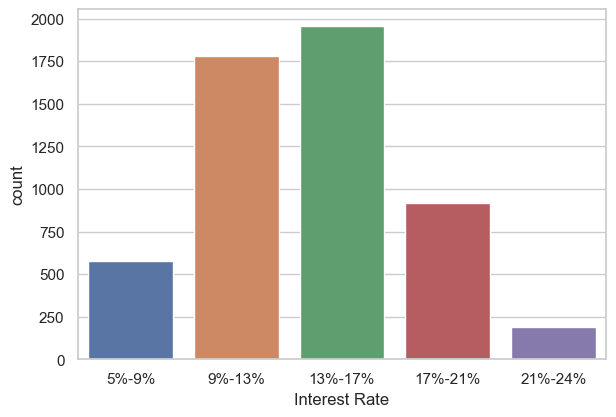

In [150]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=data_cleaned[data_cleaned.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

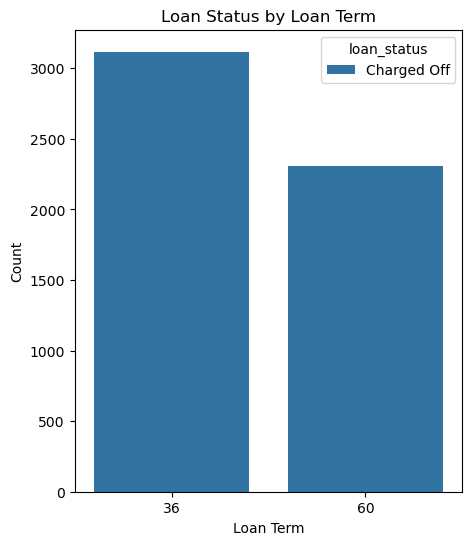

In [35]:
# Segmented Analysis: Loan status by loan term

plt.figure(figsize=(5, 6))
sns.countplot(data=data_cleaned[data_cleaned['loan_status']=='Charged Off'], x='term', hue='loan_status')
plt.title('Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

#### By Verification Status vs Loan Status

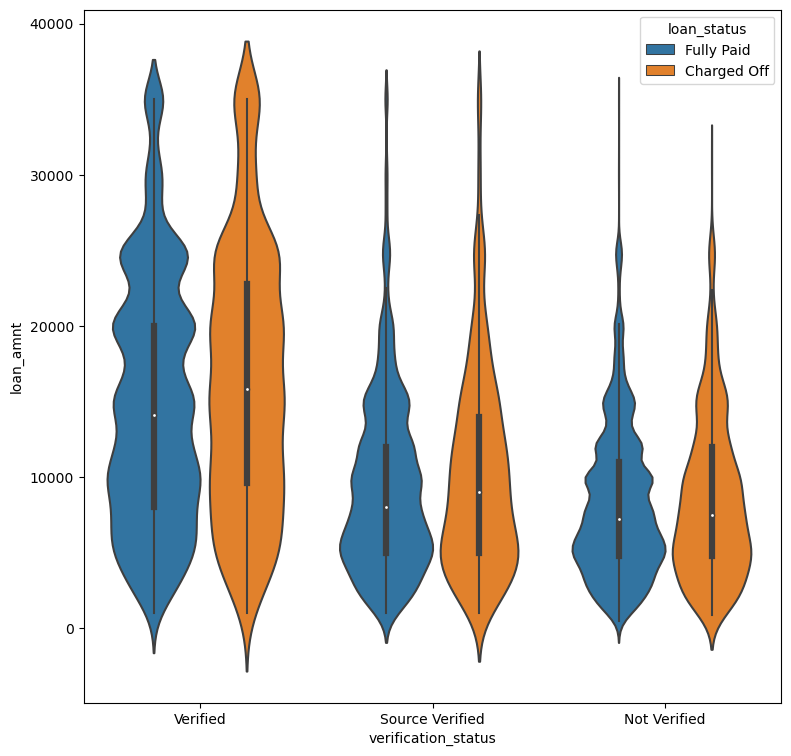

In [36]:
plt.figure(figsize=(9,9))
sns.violinplot(data =data_cleaned,x='verification_status', y='loan_amnt', hue = 'loan_status')
plt.show()

#### By Ownership vs Loan Status (Charged Off)

<Axes: xlabel='home_ownership', ylabel='count'>

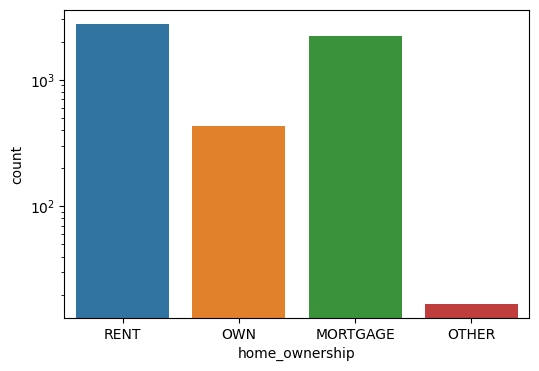

In [37]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data_cleaned[data_cleaned['loan_status']=='Charged Off'])

#### By Purpose vs Loan Status (Charged Off)

<Axes: xlabel='count', ylabel='purpose'>

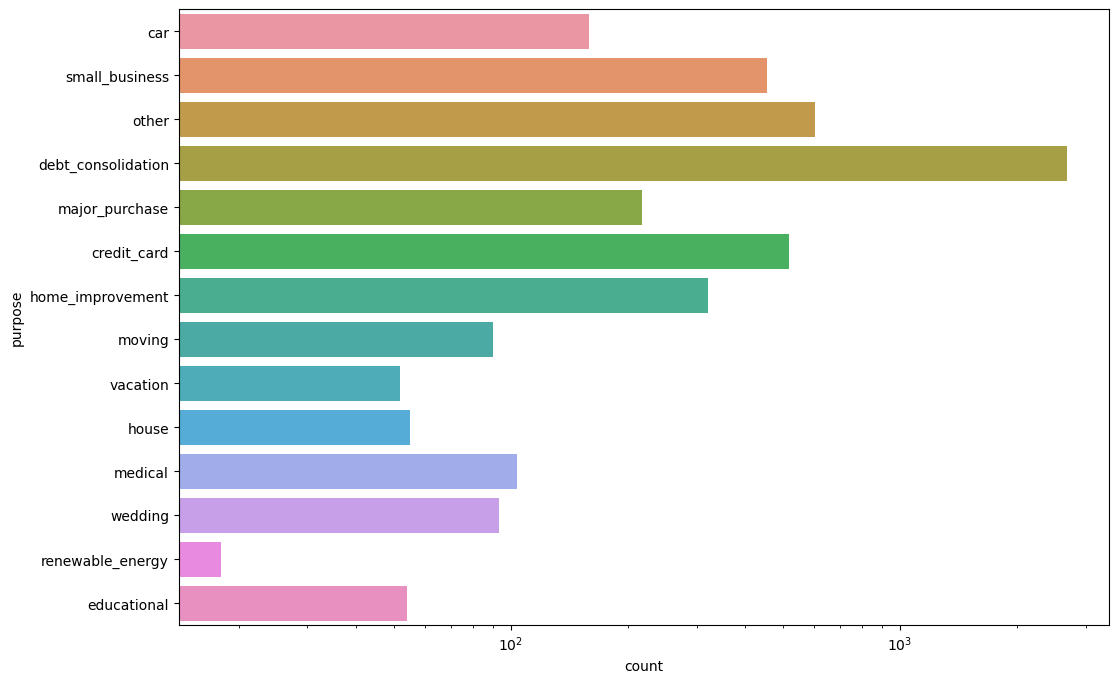

In [38]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=data_cleaned[data_cleaned.loan_status == 'Charged Off'])

#### By Employee Length vs Loan Status (Charged Off)

<Axes: xlabel='emp_length', ylabel='count'>

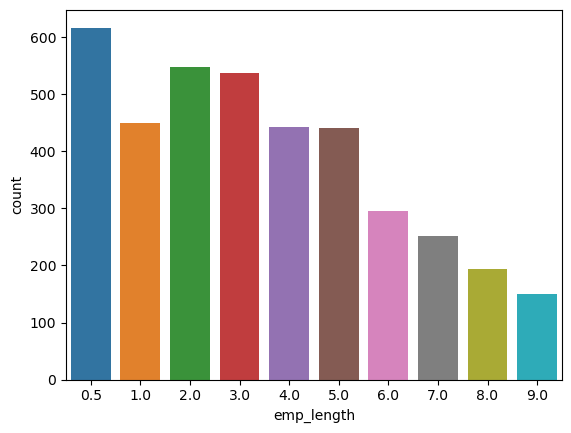

In [39]:
sns.countplot(x='emp_length', data=data_cleaned[data_cleaned.loan_status == 'Charged Off'])

#### By Inquiry in last 6 months vs Loan Status (Charged Off)

<Axes: xlabel='inq_last_6mths', ylabel='count'>

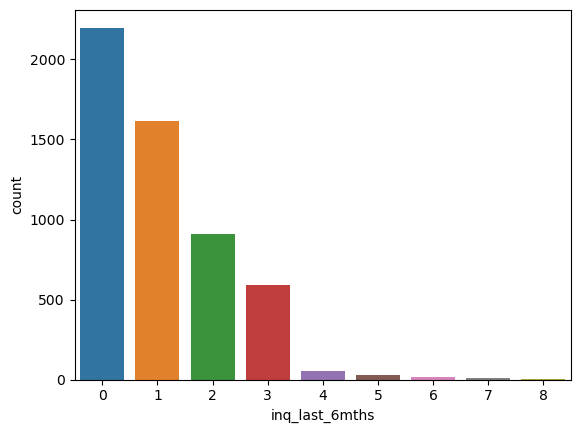

In [52]:
sns.countplot(x='inq_last_6mths', data=data_cleaned[data_cleaned.loan_status == 'Charged Off'])


#### By Term vs Loan Status (Charged Off)

<Axes: xlabel='count', ylabel='term'>

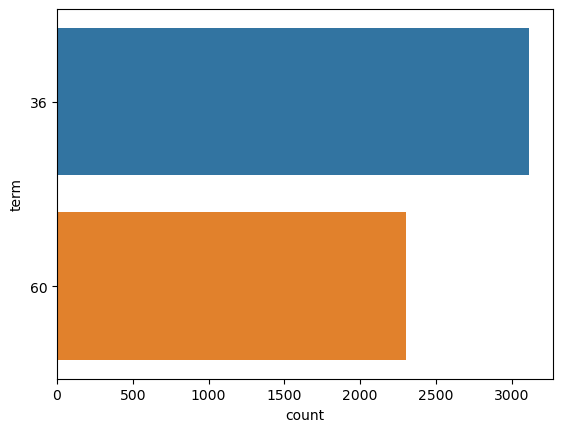

In [40]:

sns.countplot(y='term', data=data_cleaned[data_cleaned['loan_status']=='Charged Off'])

#### By 'funded_amnt_inv' by 'term' and 'loan_status

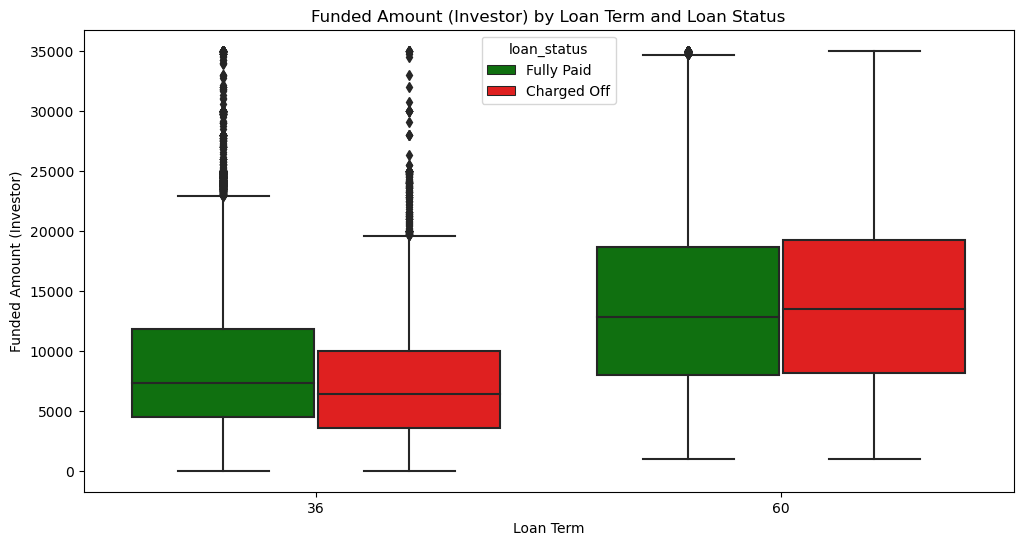

In [41]:
#Box plot for 'funded_amnt_inv' by 'term' and 'loan_status':

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='term', y='funded_amnt_inv', hue='loan_status', palette=['green', 'red'])
plt.title('Funded Amount (Investor) by Loan Term and Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Funded Amount (Investor)')
plt.show()

#### By Verification Status vs Loan Status (Charged Off)

<Axes: xlabel='verification_status', ylabel='count'>

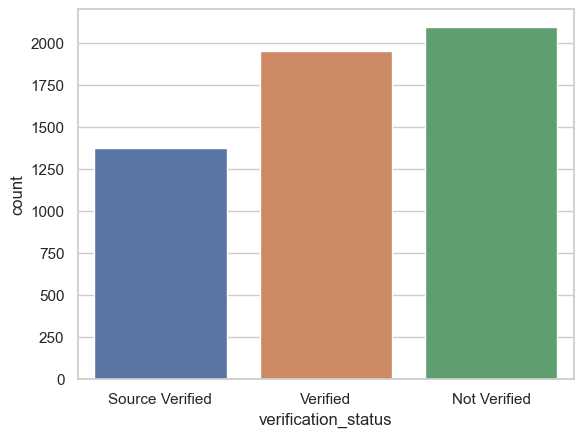

In [151]:
sns.countplot(x='verification_status', data=data_cleaned[data_cleaned['loan_status']=='Charged Off'])

#### By Year vs Loan Status (Charged Off)

<Axes: xlabel='issued_year', ylabel='count'>

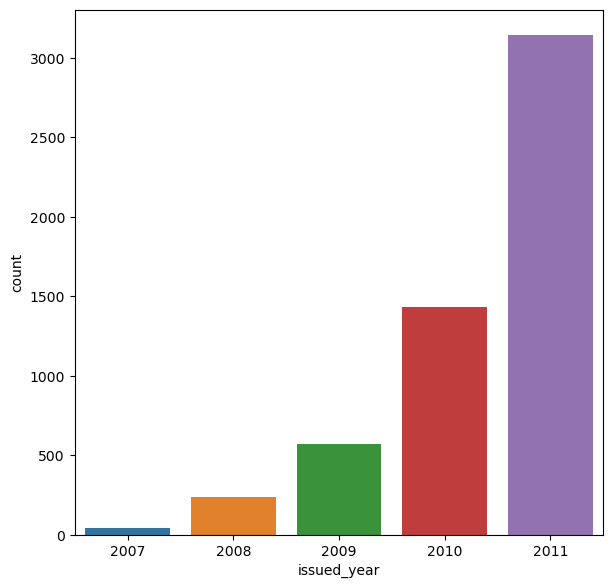

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(222)
sns.countplot(x='issued_year', data=data_cleaned[data_cleaned['loan_status']=='Charged Off'])

#### By Grade vs Loan Status (Charged Off)

<Axes: xlabel='count', ylabel='grade'>

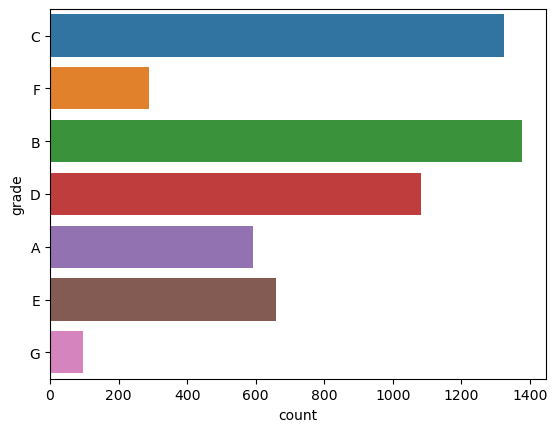

In [44]:
sns.countplot(y='grade', data=data_cleaned[data_cleaned['loan_status']=='Charged Off'])

#### By State vs Loan Status (Charged Off)

<Axes: xlabel='count', ylabel='addr_state'>

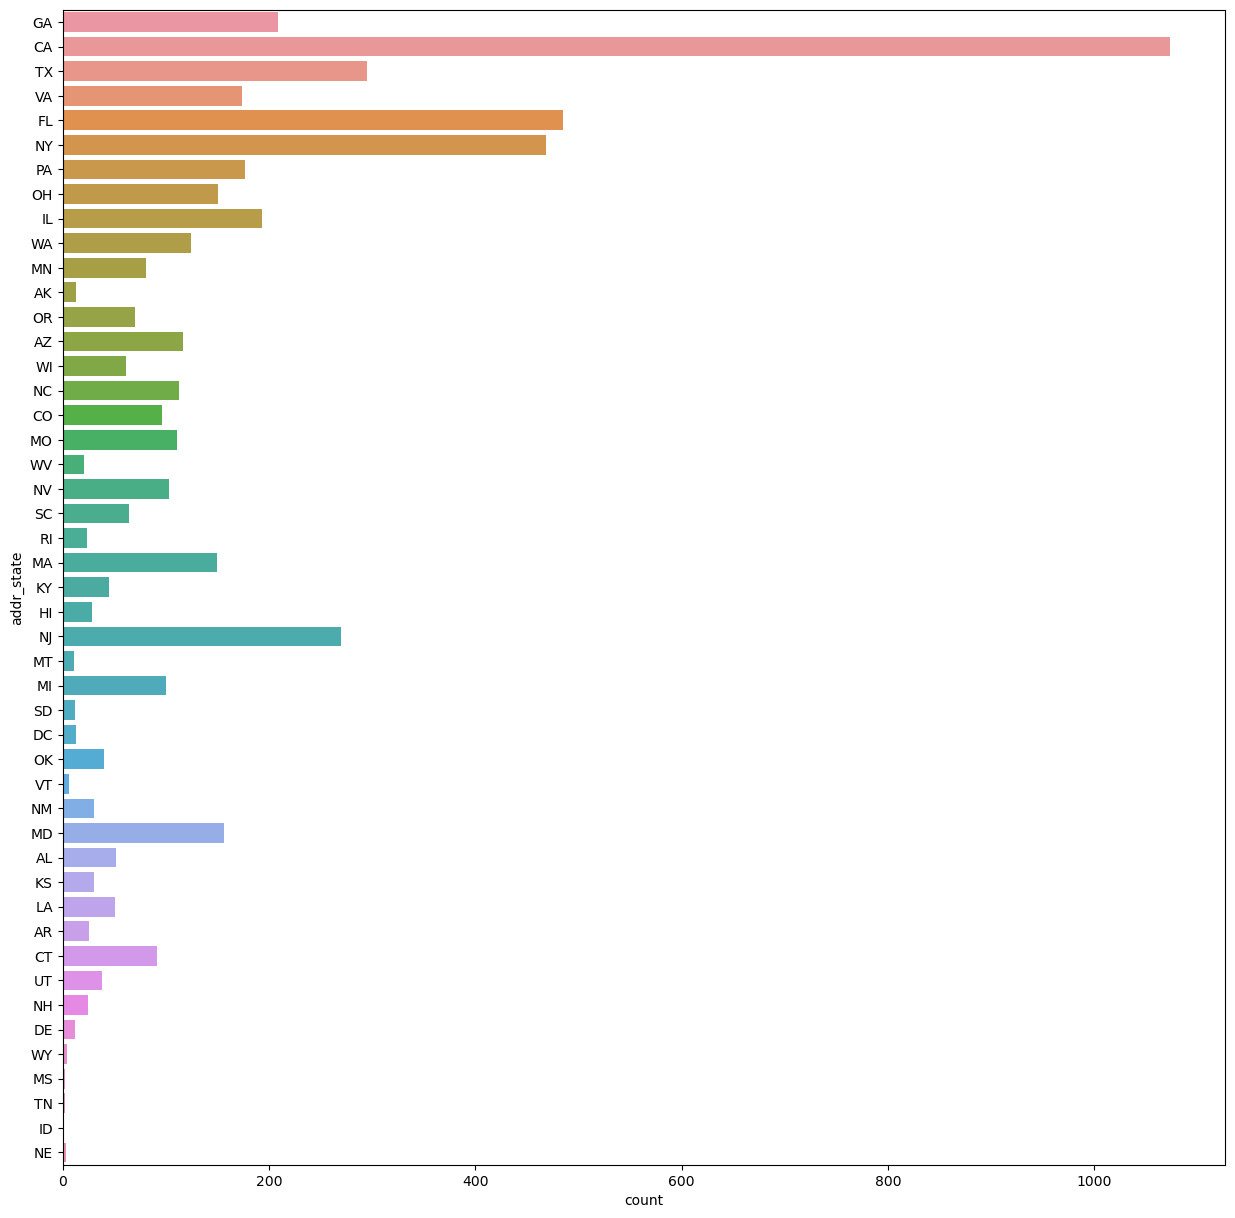

In [45]:
plt.figure(figsize=(15,15))
sns.countplot(y='addr_state', data=data_cleaned[data_cleaned['loan_status']=='Charged Off'])

#### By Annual Income vs Loan Amount

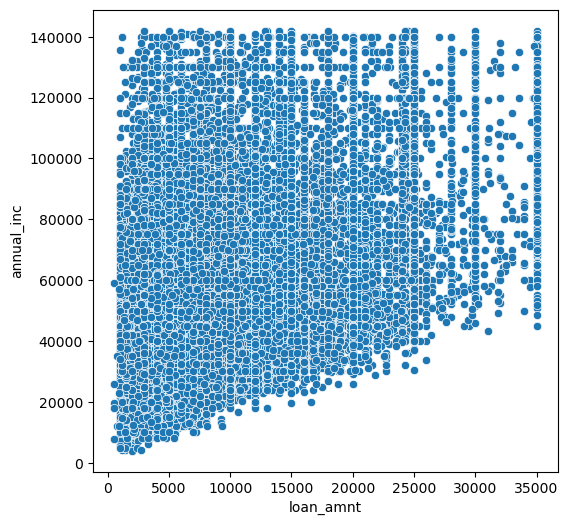

In [46]:
plt.figure(figsize=(6,6))
sns.scatterplot(data =data_cleaned,x='loan_amnt', y='annual_inc')
plt.show()

#### By Dti vs Loan amount & Loan Status (Charged Off)

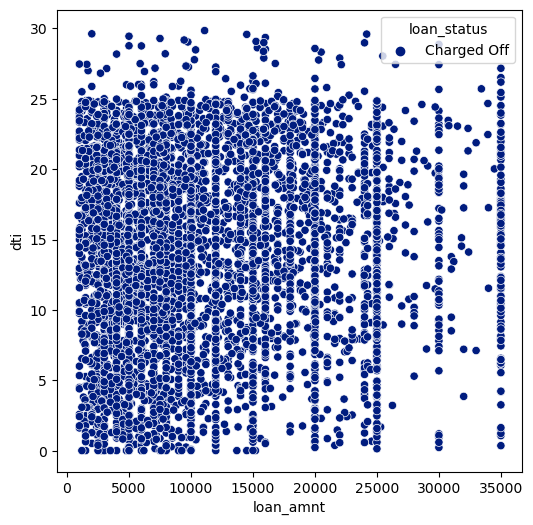

In [47]:
plt.figure(figsize=(6,6))
sns.scatterplot(data =data_cleaned[data_cleaned['loan_status']=='Charged Off'],x='loan_amnt', y='dti', hue ='loan_status',palette="dark")
plt.show()

#### By Annual Income vs Loan Status (Charged Off)

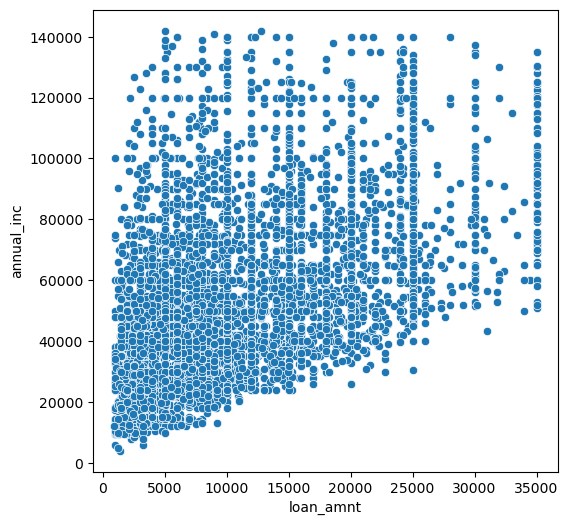

In [48]:
plt.figure(figsize=(6,6))
sns.scatterplot(data =data_cleaned[data_cleaned['loan_status']=='Charged Off'],x='loan_amnt', y='annual_inc')
plt.show()

#### Correlation between Numeric Columns

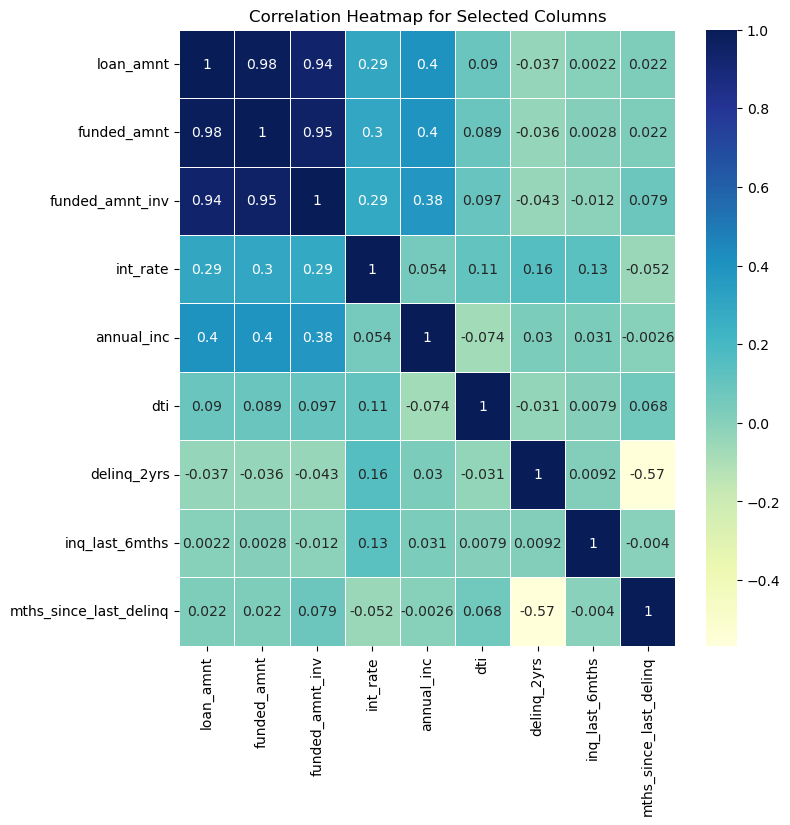

In [49]:

# Plotting a correlation graph 


Sel_Cols = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc']

correlation_matrix = data_cleaned[numeric_columns].corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()



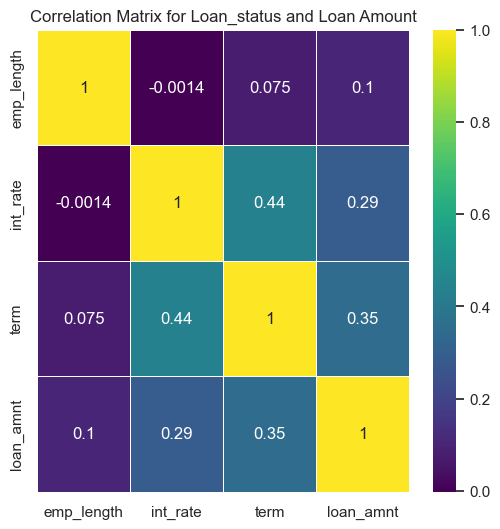

In [216]:
#Correlation matrix for the new derived metric 'emp_length','int_rate','term', and'loan_amnt':

correlation_matrix = data_cleaned[['emp_length','int_rate','term','loan_amnt']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix for Loan_status and Loan Amount')
plt.show()


#### By Annual Income vs Loan Purpose & Loan Status (Charged Off)

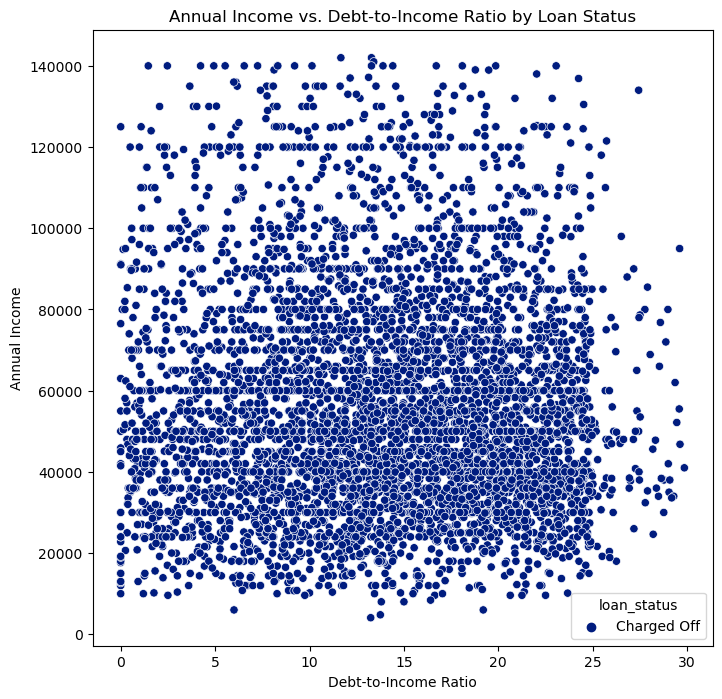

In [50]:
#Relationship between 'annual_inc' and 'dti' by 'loan_status':

plt.figure(figsize=(8, 8))
sns.scatterplot(data=data_cleaned[data_cleaned['loan_status']=='Charged Off'], x='dti', y='annual_inc', hue='loan_status', palette='dark')
plt.title('Annual Income vs. Debt-to-Income Ratio by Loan Status')
plt.ylabel('Annual Income')
plt.xlabel('Debt-to-Income Ratio')
plt.show()

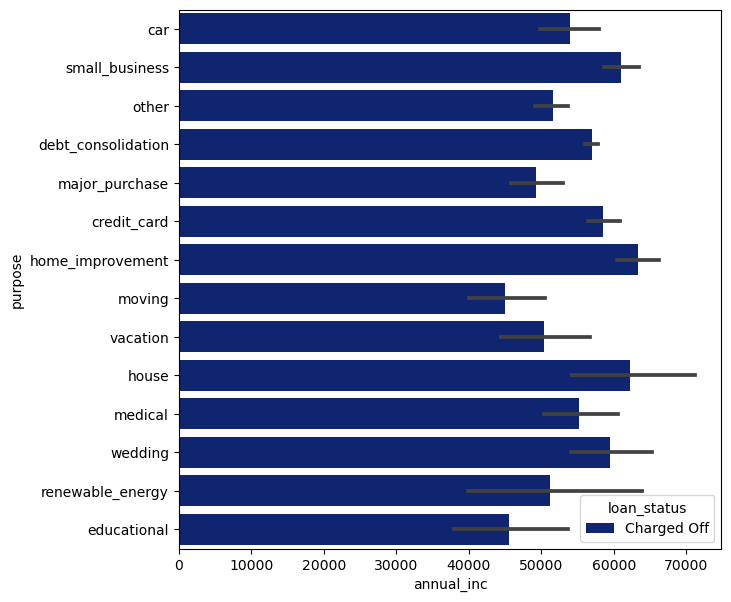

In [51]:
plt.figure(figsize=(7,7))
sns.barplot(data =data_cleaned[data_cleaned['loan_status']=='Charged Off'],x='annual_inc', y='purpose', hue ='loan_status',palette="dark")
plt.show()

### Below are a few Inferences by each Variable which must be taken into consideration while approving loan amount to an individual. The anlysis is based on the the Charged off Loans:

- If the applicant is applying loan based on the Purpose of Debt_Consolidation.
- If the applicant's Employee length or tenure of the job is below 1 year
- If the applicant's term of the loan is 36 months
- If the applicant's home ownership is "Rent"
- If the applicant is from CA (California)
- If the applicant's Grade is B
- If the Loan status of the applicant is "Not Verified"
- If the applicant's interest rate is 13-17%
- If there are 0 enquiries in the last 6 months
- If the applicants who have an income of range 31,000 - 58,500
- If the applicants Loan amount is in between 5,500 - 10,500
- If the applicants monthly installments are between 140 - 275
- If the applicants applying loan for 'home improvement' whose income is between 60k -70k
- If the Dti is in between 12-18